<a href="https://colab.research.google.com/github/Tagtshen/Computational-physics-Assignments-/blob/main/ASSIGNMENT_4_Tagtshen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1: Random number generation using Linear Congruential random Number generator

Execution time for LCG: 0.008500337600708008


<Figure size 1000x800 with 0 Axes>

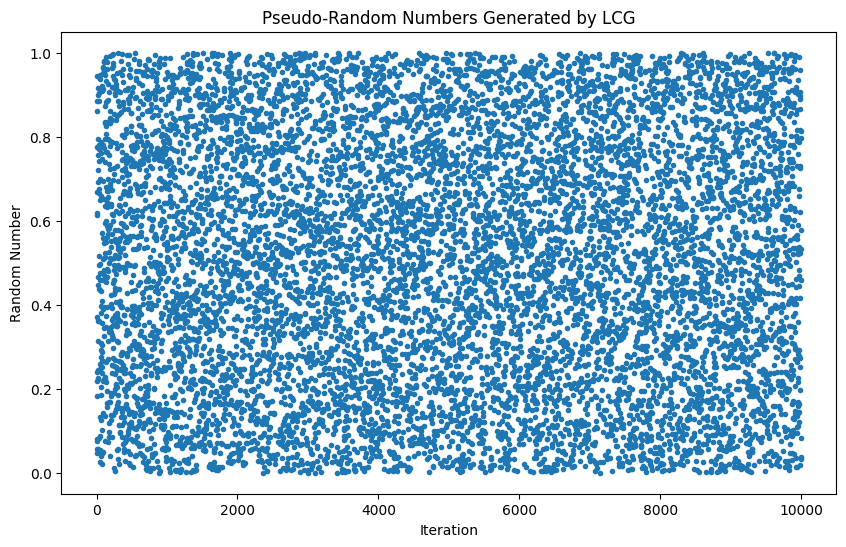

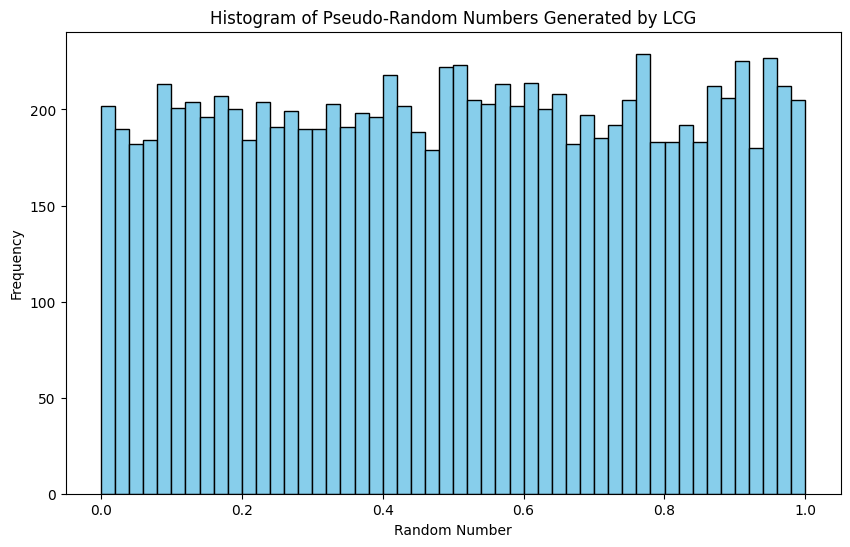

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
a=191293
b=139941249
m=934124814801
n= 10001
seed=235432
x_next=seed
start=time.time()
x_values=[]
for i in range(n):
 x_next=(a*x_next+b)%m
 x_values.append(x_next)
end=time.time()
execution_time= end-start

x_normalized=[x / m for x  in x_values] #normalised to create the random number between 0 and 1

print('Execution time for LCG:',execution_time)

plt.figure(figsize=(10,8))
plt.figure(figsize=(10, 6))
plt.plot(x_normalized[:10001], marker='.', linestyle='none') #plot of frist 100 random number
plt.title('Pseudo-Random Numbers Generated by LCG')
plt.xlabel('Iteration')
plt.ylabel('Random Number')

plt.figure(figsize=(10, 6))
plt.hist(x_normalized[:10000], bins=50, color='skyblue', edgecolor='black') # plot histogram of first 10000 random numbers
plt.title('Histogram of Pseudo-Random Numbers Generated by LCG')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

plt.show()



QUESTION 2: Random nunber generation using np.random.rand()

execution time = 0.005298137664794922


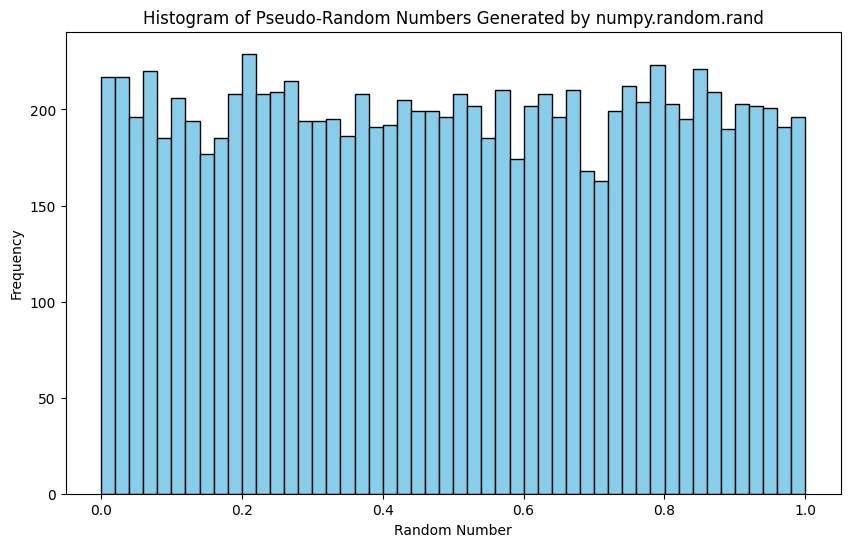

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n=10000
start=time.time()
random=np.random.rand(n)
end=time.time()

print("execution time =",end-start)

plt.figure(figsize=(10, 6))
plt.hist(random[:10000], bins=50, color='skyblue', edgecolor='black') # plot histogram of first 10000 random numbers
plt.title("Histogram of Pseudo-Random Numbers Generated by numpy.random.rand")
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()



QUESTION 4: Transformation Method


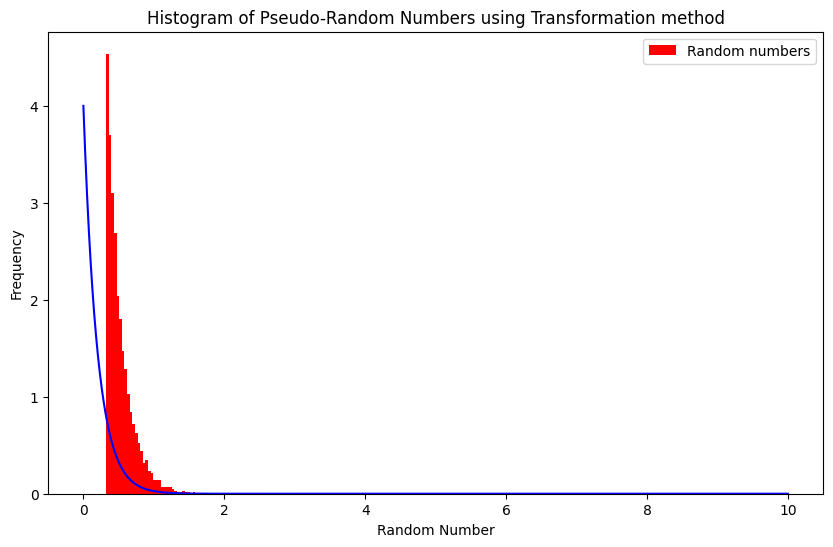

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Transformation(n):
  x1=np.random.rand(n)
  f=-mean*np.log(mean*x1)
  return f

def gaussian_(t):
  return 4*np.exp(-t/0.2)

n=10000
mean=0.2
f=Transformation(n)
t=np.linspace(0,10,n)

plt.figure(figsize=(10, 6))
plt.hist(f,bins=50,density= True,color='RED',label='Random numbers')

plt.legend()

plt.title("Histogram of Pseudo-Random Numbers using Transformation method")
plt.plot(t,gaussian_(t),color='BLUE',label='Gaussian function')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()







QUESTION 5: Box muller method

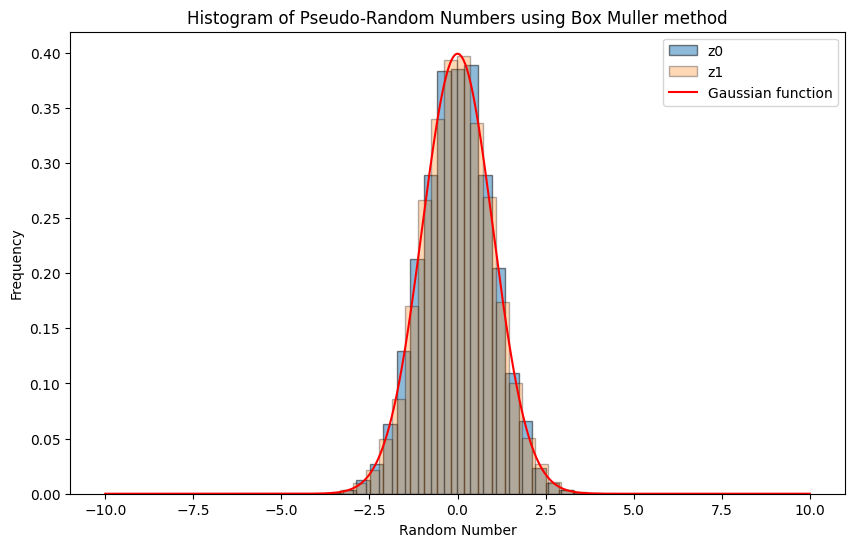

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def BOX_MULLER(n):
  x1=np.random.rand(n)
  x2=np.random.rand(n)
  z0=np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*x2)
  z1=np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*x2)
  return z0,z1

def gaussian_(t):
  return (1/(np.sqrt(np.pi*2)))*np.exp(-(t**2)/2)


n=10000
z0,z1=BOX_MULLER(n)
t=np.linspace(-10,10,n)

plt.figure(figsize=(10, 6))
plt.hist(z0, bins=20,density=True,alpha=0.5, edgecolor='black',label='z0')
plt.hist(z1, bins=20,density=True,alpha=0.3, edgecolor='black',label='z1')
plt.plot(t,gaussian_(t),color='RED',label='Gaussian function')
plt.legend()

plt.title("Histogram of Pseudo-Random Numbers using Box Muller method")
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()







QUESTION 6: Rejection method


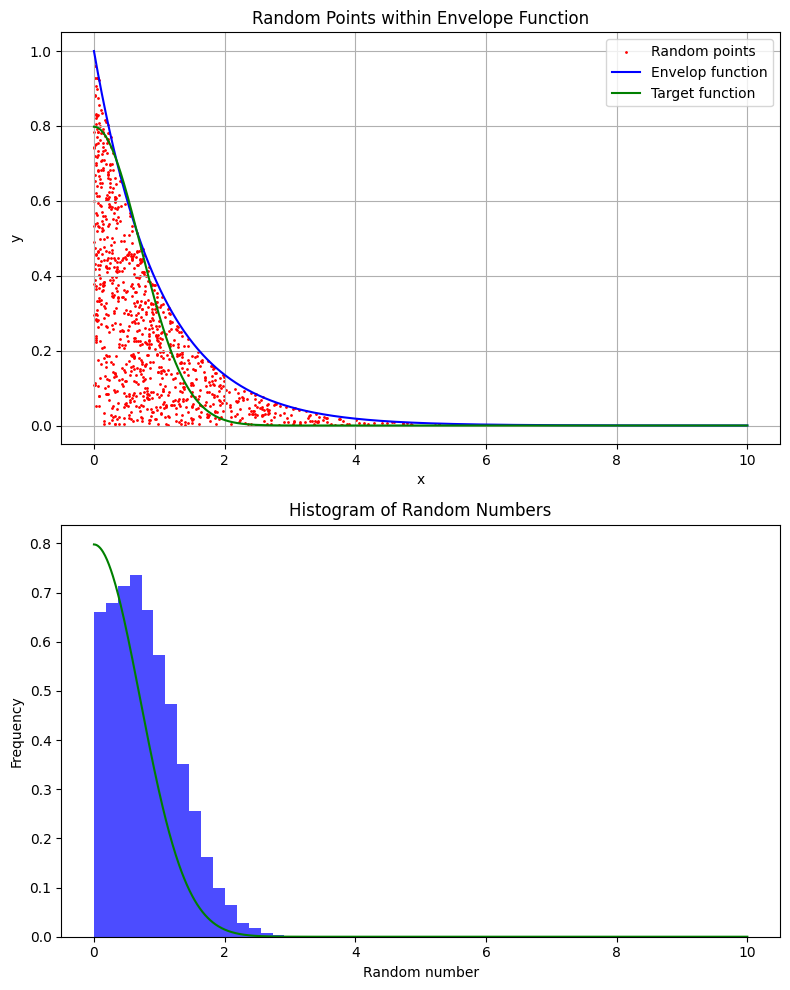

In [59]:
import numpy as np
import matplotlib.pyplot as plt
def envelop_(m):
     return np.exp(-m)

def target_(t):
     return np.sqrt(2/np.pi)*np.exp(-t**2)

def generate_random(n):
  points=[]
  random=[]
  while len(points)<n :
        x=np.random.uniform(0,10)
        y=np.random.uniform(0,10)
        u=np.random.uniform(0,1)
        if y<=envelop_(x):
          points.append((x,y))
        if u<=target_(x)/envelop_(x):
          random.append(x)
  return points,random

n=1000
points,random=generate_random(n)
m=np.linspace(0,10,n)
t=np.linspace(0,10,n)
x_val,y_val=zip(*points)
# random= random_numbers(n)
# print(random)
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.scatter(x_val,y_val,color='red',s=1,label='Random points')
plt.plot(m,envelop_(m),color='blue',label='Envelop function')
plt.plot(t,target_(t),color='green',label='Target function')
# plt.axvline(x=0,color='black',linestyle='--')
# plt.axhline(y=0,color='black',linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Points within Envelope Function')

plt.grid(True)


plt.subplot(2,1,2)
plt.hist(random,bins=20,density=True,color='blue',alpha=0.7)
plt.plot(t,target_(t),color='green',label='Target function')
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers')
plt.tight_layout()
plt.show()

In [ ]:
Question 7: Chi ^2 Test

The value of Chi square stastic for Observed count I = 29.491666666666667
The value of Chi square stastic for Observed count II= 1.1416666666666666
The probability of V1 being = 29.491666666666667 is 0.0010368888967215995
The probability of V2 being = 1.1416666666666666 is 0.999685063315782
The check for randomness for V1= 29.491666666666667  is  Not sufficiently random
The check for randomness for V2= 1.1416666666666666  is  Not sufficiently random


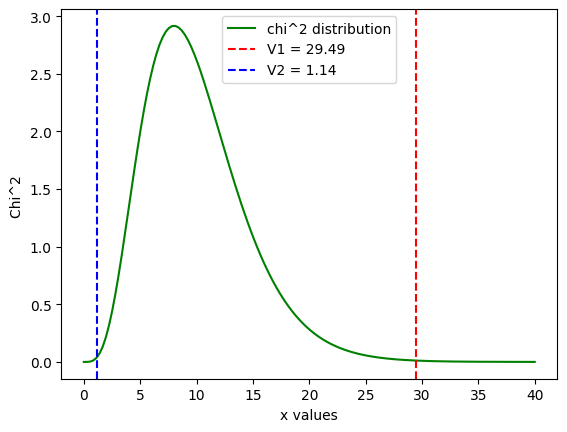

In [ ]:
import numpy as np
from scipy.special import gamma

def chi_square(x,k):
  return (1/(2**(1/k)*gamma(k/2)))*x**(k/2-1)*np.exp(-x/2)

m=12 # total no of outcomes
k=11-1 # degrees of freedom
n= 144 #no of times two pair of dice were thrown
Observed_counts1=[4,10,10,13,20,18,18,11,13,14,13]
Observed_counts2=[3,7,11,15,19,24,21,17,13,9,5]
expected_count=[4,8,12,16,20,24,20,16,12,8,4]
P=[1/36,1/18,1/12,1/9,5/36,1/6,5/36,1/9,1/12,1/18,1/36]
V=0

for i in range(p):
  V=(Observed_counts1[i]-n*P[i])/(n*P[i])



print(len(Observed_counts1),len(P))












Question 8 : Area of circle

<ipython-input-61-102bb8ad96ee>:23: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  actual_volume_sphere = np.pi**(D/2) / np.math.gamma(D/2 + 1)


Estimated volume of the 10-dimensional unit sphere: 2.2528
Actual volume of the 10-dimensional unit sphere: 2.550164039877345
Estimated value of area for R=1 is  3.1384 ,actual value of the area is  3.141592653589793


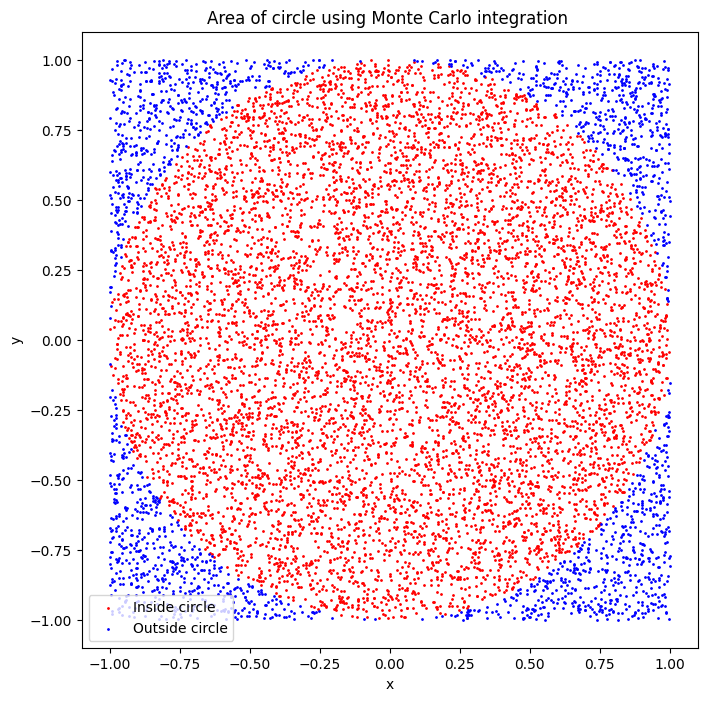

In [61]:
import numpy as np
import matplotlib.pyplot as plt

N=10000# no of random points
R= 1 #radius of the circle
D=10 #dimensionality
L=2*R
x=np.random.uniform(-R,R,N)
y=np.random.uniform(-R,R,N)

inside_circle =x**2+y**2 <= R**2
area_square=L**2

estimated_area_circle= area_square*(np.sum(inside_circle)/N)

actual_area= np.pi*R**2

#volume of 10 dimension sphere
points = np.random.uniform(-R, R, size=(N, D))
inside_sphere = np.sum(points**2, axis=1) <= R**2
volume_of_hypercube = (2 * R)**D
estimated_volume_sphere = volume_of_hypercube * np.sum(inside_sphere) / N
actual_volume_sphere = np.pi**(D/2) / np.math.gamma(D/2 + 1)


print(f'Estimated volume of the 10-dimensional unit sphere: {estimated_volume_sphere}')
print(f'Actual volume of the 10-dimensional unit sphere: {actual_volume_sphere}')


print('Estimated value of area for R=1 is ',estimated_area_circle,',actual value of the area is ',actual_area)



plt.figure(figsize=(8,8))
plt.scatter(x[inside_circle],y[inside_circle],color='red',label='Inside circle',s=1)
plt.scatter(x[~inside_circle],y[~inside_circle],color='blue',label='Outside circle',s=1)
plt.title('Area of circle using Monte Carlo integration ')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

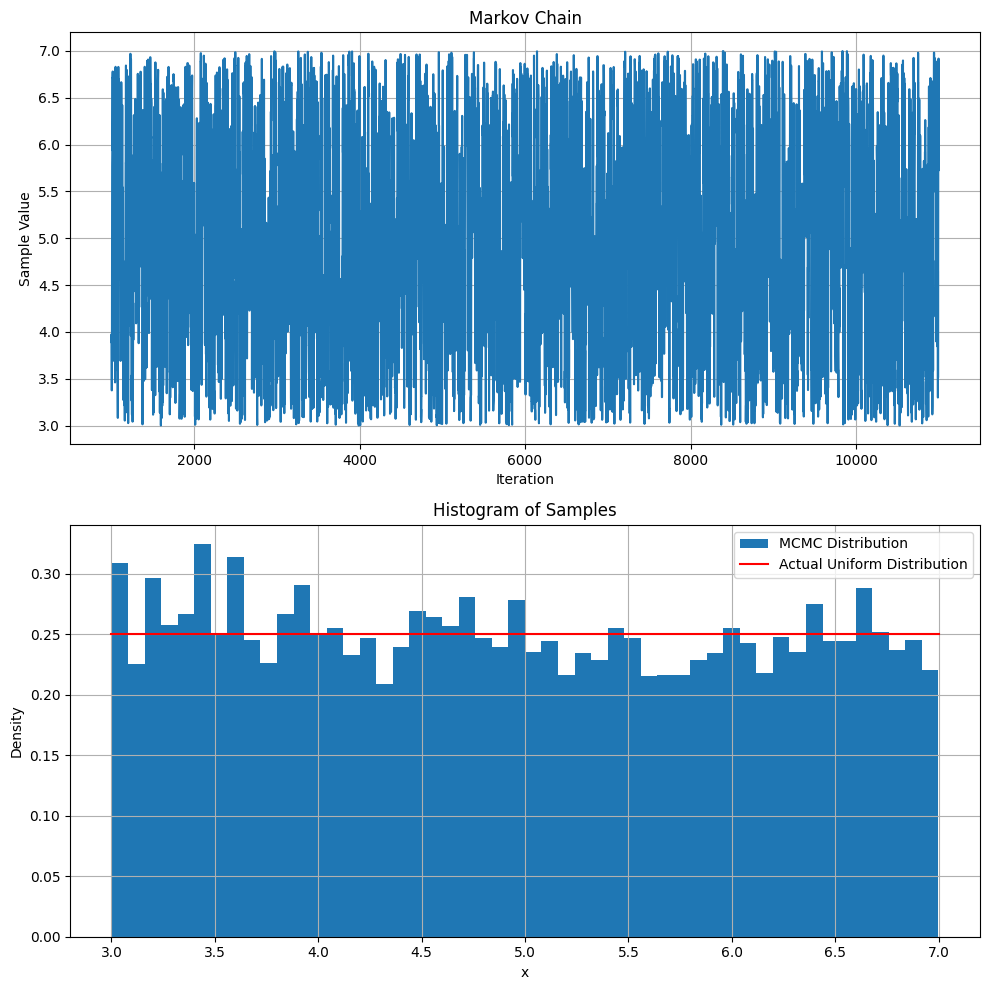

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def target_density(x):
    if 3 < x < 7:
        return 1 / 4
    else:
        return 0

def metropolis_sampler(n_samples, burn_in, initial_value, proposal_std):
    samples = []
    current_value = initial_value
    for i in range(n_samples + burn_in):
        proposal = current_value + np.random.normal(0, proposal_std)  # Proposal step
        acceptance_ratio = min(1, target_density(proposal) / target_density(current_value))

        if np.random.rand() < acceptance_ratio:
            current_value = proposal

        if i >= burn_in:
            samples.append(current_value)

    return samples

n_samples = 10000
burn_in = 1000
initial_value = 5.0
proposal_std = 1.0

samples = metropolis_sampler(n_samples, burn_in, initial_value, proposal_std)

# Plotting the Markov Chain
iterations = np.arange(burn_in, burn_in + n_samples)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Plot the Markov Chain
ax1.plot(iterations, samples)
ax1.set_title('Markov Chain')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')
ax1.grid(True)

# Plot the histogram of the samples
ax2.hist(samples, bins=50, density=True, label='MCMC Distribution')
ax2.plot([3, 7], [0.25, 0.25], label='Actual Uniform Distribution', color='red')
ax2.set_title('Histogram of Samples')
ax2.set_xlabel('x')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
Question 10: Bayesian Probablistic inference

100%|██████████| 4000/4000 [00:15<00:00, 264.80it/s]


Best-fit values:
 a = -0.0043245588864620505 ± 0.0002176135895902745
 b = 2.328725978440898 ± 0.0745177231961323
 c = 148.64810277357157 ± 6.227544023789947


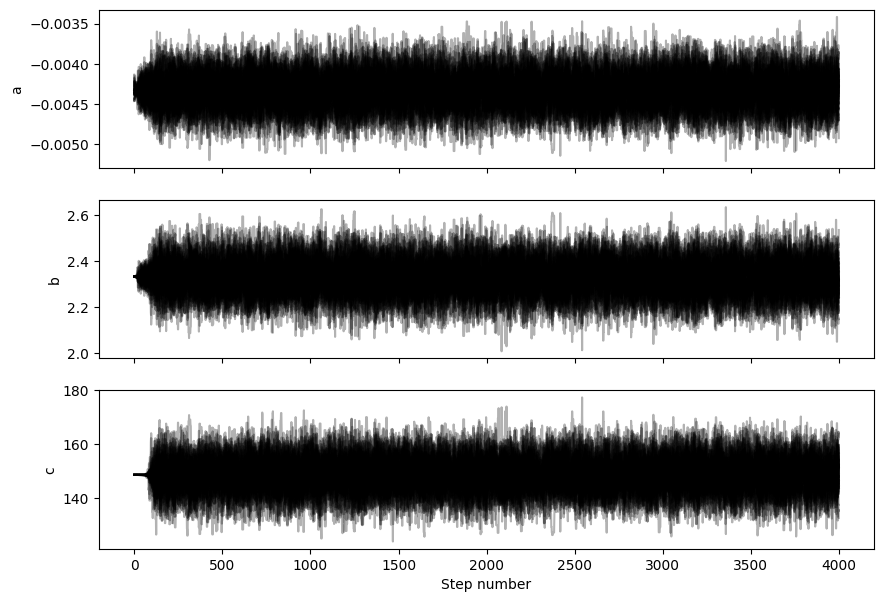

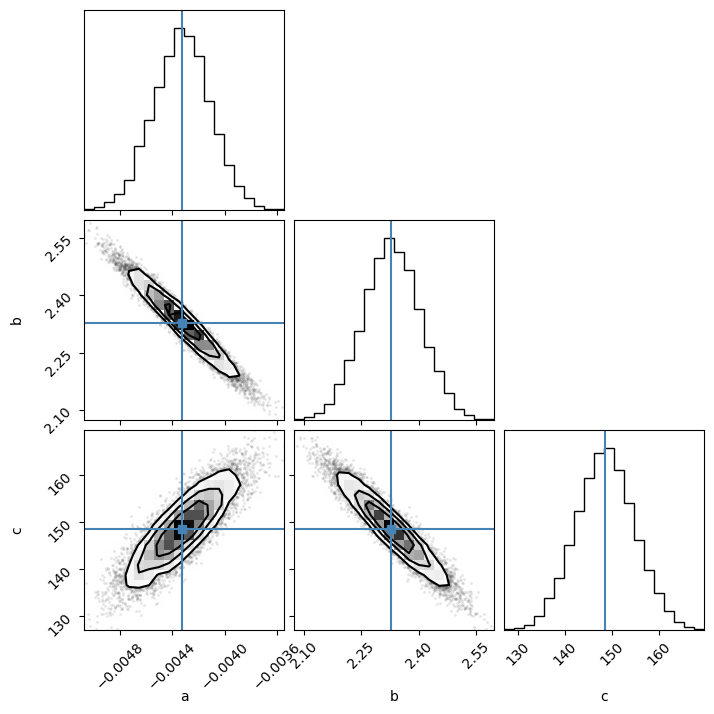

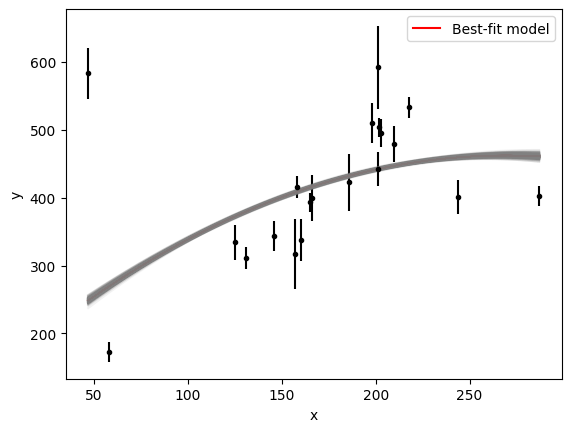

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from scipy.optimize import minimize

# Provided data
data = np.array([
    [1, 201, 592, 61], [2, 244, 401, 25], [3,  47, 583, 38], [4, 287, 402, 15],
    [5, 203, 495, 21], [6,  58, 173, 15], [7, 210, 479, 27], [8, 202, 504, 14],
    [9, 198, 510, 30], [10, 158, 416, 16], [11, 165, 393, 14], [12, 201, 442, 25],
    [13, 157, 317, 52], [14, 131, 311, 16], [15, 166, 400, 34], [16, 160, 337, 31],
    [17, 186, 423, 42], [18, 125, 334, 26], [19, 218, 533, 16], [20, 146, 344, 22]
])

x = data[:, 1]
y = data[:, 2]
sigma = data[:, 3]

# Define the model
def model(params, x):
    a, b, c = params
    return a * x**2 + b * x + c


def log_likelihood(params, x, y, yerr):
    model_y = model(params, x)
    sigma2 = yerr
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(2 * np.pi * sigma2))


def log_prior(params):
  return 0

def log_posterior(params, x, y, yerr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, yerr)



# Set up the sampler
n_dim = 3  # number of parameters (a, b, c)
n_walkers = 50
n_steps = 4000

# Initialize the walkers
initial_guess = [0.1, 0.1, 0.1]
pos = initial_guess + 1e-4 * np.random.randn(n_walkers, n_dim)

initial = np.array([0.0,3.0,100.0])
nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll,initial,args=(x,y,sigma))
pos = soln.x + 1e-4 * np.random.randn(n_walkers, n_dim)




# Run the MCMC
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(x, y, sigma))
sampler.run_mcmc(pos, n_steps, progress=True)

# Extract the samples
samples = sampler.get_chain(discard=1000, thin=15, flat=True)

# Get the best-fit values and their uncertainties
best_fit = np.median(samples, axis=0)
a_median, b_median, c_median = best_fit
a_std, b_std, c_std = np.std(samples, axis=0)

print(f"Best-fit values:\n a = {a_median} ± {a_std}\n b = {b_median} ± {b_std}\n c = {c_median} ± {c_std}")

# Plot the chains
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = ["a", "b", "c"]
for i in range(n_dim):
    ax = axes[i]
    ax.plot(sampler.get_chain()[:, :, i], "k", alpha=0.3)
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("Step number")
plt.show()

# Corner plot
fig = corner.corner(samples, labels=["a", "b", "c"], truths=[a_median, b_median, c_median])
plt.show()

# Plot the data with the best-fit model and 200 random models from the posterior
x_fit = np.linspace(min(x), max(x), 500)
y_fit = a_median * x_fit**2 + b_median * x_fit + c_median

plt.errorbar(x, y, yerr=sigma, fmt=".k", capsize=0)
plt.plot(x_fit, y_fit, label="Best-fit model", color="red")

for s in samples[np.random.randint(len(samples), size=200)]:
    plt.plot(x_fit, s[0] * x_fit**2 + s[1] * x_fit + s[2], color="gray", alpha=0.1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
